In [1]:
import numpy as np 
import pandas as pd 
import nltk

df = pd.read_csv("UCIdrug_train.csv")
df=df.head(150000)

In [2]:
df.shape

(150000, 7)

In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum().sort_values(ascending=False)

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [5]:
df=df[['review','rating']]
df

,review,rating
0,"""It has no side effect, I take it in combinati...",9
1,"""My son is halfway through his fourth week of ...",8
2,"""I used to take another oral contraceptive, wh...",5
3,"""This is my first time using any form of birth...",8
4,"""Suboxone has completely turned my life around...",9
...,...,...
149995,"""My Dr was unbelievably careless and combined ...",1
149996,"""When I was in the service I had a few bouts w...",9
149997,"""I&#039;ve used the 3 day monistat before and ...",10
149998,"""When I run out of these patches the pain hits...",8


In [6]:
import string
string.punctuation
string.digits

'0123456789'

In [7]:
def data_clean(review):
    v="".join([i for i in review if i.isprintable()==True])
    x="".join([word for word in v if word not in string.punctuation]) 
    return "".join([word.lower() for word in x if word not in string.digits]) 
    

In [8]:
df['review']=df['review'].apply(data_clean)
df.review

0         it has no side effect i take it in combination...
1         my son is halfway through his fourth week of i...
2         i used to take another oral contraceptive whic...
3         this is my first time using any form of birth ...
4         suboxone has completely turned my life around ...
                                ...                        
149995    my dr was unbelievably careless and combined t...
149996    when i was in the service i had a few bouts wi...
149997    ive used the  day monistat before and it made ...
149998    when i run out of these patches the pain hits ...
149999    i started taking chantix in august after filli...
Name: review, Length: 149155, dtype: object

In [9]:
df.rating.value_counts().sort_values(ascending=False)

10    47163
9     25514
1     20014
8     17489
7      8764
5      7346
2      6400
3      6007
6      5838
4      4620
Name: rating, dtype: int64

In [10]:
value = df['rating'].count()
value

149155

In [11]:
def analysis(rating):
    if rating <= 5:
        return 0
    elif rating == 6 or rating == 7 :
        return 1
    else:
        return 2


df['new_rating'] = df['rating'].apply(lambda x: analysis(x))

In [12]:
# df['new_rating']
count_class_0,count_class_1,count_class_2=df.new_rating.value_counts()
count_class_0,count_class_1,count_class_2

df_zeros=df[df['new_rating']==0]
df_ones=df[df['new_rating']==1]
df_twos=df[df['new_rating']==2]

df_zeros_under=df_zeros.sample(count_class_2)
df_twos_under=df_twos.sample(count_class_2)
df_under_sampling = pd.concat([df_zeros_under,df_twos_under,df_ones],axis=0)


print(df_under_sampling .new_rating.value_counts())

0    14602
2    14602
1    14602
Name: new_rating, dtype: int64


C:\Users\2151399\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_rating', ylabel='count'>

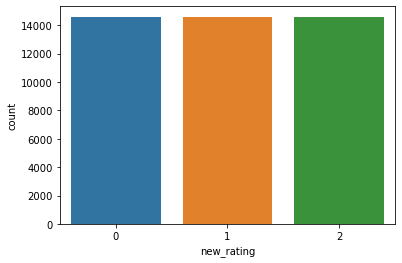

In [13]:
import seaborn as sns
sns.countplot(df_under_sampling["new_rating"])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=list(df_under_sampling ["review"])
y=list(df_under_sampling ["new_rating"])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [17]:
print(X_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
print(y_train)

[0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 

In [19]:
print(X_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
print(y_test)

[2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 

In [21]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')     

In [22]:
import torch as pt

In [23]:
train_encodings = tokenizer(X_train, truncation=True, padding=True,return_tensors='pt')
test_encodings = tokenizer(X_test, truncation=True, padding=True,return_tensors='pt')

In [24]:
print(train_encodings)
print(test_encodings)

{'input_ids': tensor([[  101,  1045,  5223,  ...,     0,     0,     0],
        [  101,  4067,  2643,  ...,     0,     0,     0],
        [  101, 25614,  6933,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2288,  ...,     0,     0,     0],
        [  101,  1045,  2001,  ...,     0,     0,     0],
        [  101,  1045,  2001,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}
{'input_ids': tensor([[ 101, 2023, 2003,  ...,    0,    0,    0],
        [ 101, 2069, 7126,  ...,    0,    0,    0],
        [ 101, 4998, 2013,  ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2318,  ...,    0,    0,    0],
        [ 101, 1045, 2001,  ...,    0,    0,    0],
        [ 101, 7887, 7501,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 

In [25]:
class UCIDataset(pt.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = pt.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = UCIDataset(train_encodings, y_train)
test_dataset = UCIDataset(test_encodings, y_test)

In [26]:
train_dataset,test_dataset

(<__main__.UCIDataset at 0x1a6a4b92dc0>,
 <__main__.UCIDataset at 0x1a6a4b92d90>)

In [27]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    learning_rate=2e-5,
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

In [28]:
class_names={0:"negative",1:"neutral", 2:"positive"}

In [29]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3,id2label=class_names,label2id=class_names)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [30]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset            # evaluation dataset
)

In [31]:
trainer.train()

C:\Users\2151399\Anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 35044
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4382
  Number of trainable parameters = 66955779
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2751264945.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss
10,1.103500
20,1.111500
30,1.097100
40,1.101900
50,1.104000
60,1.095200
70,1.097100
80,1.095600
90,1.097000
100,1.088500


Saving model checkpoint to ./results\checkpoint-500
Configuration saved in ./results\checkpoint-500\config.json
Model weights saved in ./results\checkpoint-500\pytorch_model.bin
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2751264945.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}
Saving model checkpoint to ./results\checkpoint-1000
Configuration saved in ./results\checkpoint-1000\config.json
Model weights saved in ./results\checkpoint-1000\pytorch_model.bin
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2751264945.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for

TrainOutput(global_step=4382, training_loss=0.7005071955856695, metrics={'train_runtime': 484517.5405, 'train_samples_per_second': 0.145, 'train_steps_per_second': 0.009, 'total_flos': 9284540610650112.0, 'train_loss': 0.7005071955856695, 'epoch': 2.0})

In [32]:
trainer.evaluate(test_dataset)

***** Running Evaluation *****
  Num examples = 8762
  Batch size = 64
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2751264945.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.6982564926147461,
 'eval_runtime': 20889.3038,
 'eval_samples_per_second': 0.419,
 'eval_steps_per_second': 0.007,
 'epoch': 2.0}

In [33]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 8762
  Batch size = 64
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2751264945.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}


PredictionOutput(predictions=array([[-2.3656998 , -0.2982105 ,  2.6687863 ],
       [-0.4199053 ,  1.0842927 , -0.81636786],
       [ 2.4379342 , -0.17976233, -2.0433307 ],
       ...,
       [-2.6179338 , -0.11420102,  2.647622  ],
       [-2.4901528 ,  0.28442404,  2.1261733 ],
       [ 1.410148  ,  0.5757089 , -1.8921527 ]], dtype=float32), label_ids=array([2, 1, 0, ..., 2, 1, 0], dtype=int64), metrics={'test_loss': 0.6982564926147461, 'test_runtime': 21016.3216, 'test_samples_per_second': 0.417, 'test_steps_per_second': 0.007})

In [34]:
#trainer.predict(test_dataset)[0]

In [34]:
output=trainer.predict(test_dataset)[0]
outputt=np.argmax(output,axis=1)
outputt


***** Running Prediction *****
  Num examples = 8762
  Batch size = 64
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2751264945.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}


array([2, 1, 0, ..., 2, 2, 0], dtype=int64)

In [35]:
def Probability(output, prediction):
    proba = softmax(torch.from_numpy(output.predictions))
    perc = 0
    if prediction == -1:
        perc = (proba[0][0] + proba[0][1]) * 100;
    elif prediction == 0:
        perc = (proba[0][1] + proba[0][2]) * 100;
    else:
        perc = (proba[0][1] + proba[0][2]) * 100;
        
    percen = str(perc)
    finalOutput = percen[7] + percen[8] + "." + percen[8] + percen[8] + " " +"%"
    return finalOutput;

In [36]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,outputt)
cm

array([[2158,  669,  113],
       [ 441, 1933,  553],
       [ 122,  653, 2120]], dtype=int64)

<AxesSubplot:>

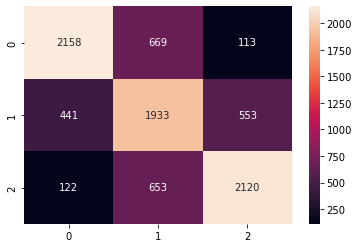

In [37]:
sns.heatmap(cm, annot=True,fmt="d")  

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, outputt))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2940
           1       0.59      0.66      0.63      2927
           2       0.76      0.73      0.75      2895

    accuracy                           0.71      8762
   macro avg       0.72      0.71      0.71      8762
weighted avg       0.72      0.71      0.71      8762



In [39]:
trainer.save_model('CSAT_senti_model')

Saving model checkpoint to CSAT_senti_model
Configuration saved in CSAT_senti_model\config.json
Model weights saved in CSAT_senti_model\pytorch_model.bin


In [42]:
tokenizer.save_pretrained("C:\\Users\\2151399\\OneDrive - Cognizant\\Desktop\\nlp_project\\CSAT_senti_model")

tokenizer config file saved in C:\Users\2151399\OneDrive - Cognizant\Desktop\nlp_project\CSAT_senti_model\tokenizer_config.json
Special tokens file saved in C:\Users\2151399\OneDrive - Cognizant\Desktop\nlp_project\CSAT_senti_model\special_tokens_map.json


('C:\\Users\\2151399\\OneDrive - Cognizant\\Desktop\\nlp_project\\CSAT_senti_model\\tokenizer_config.json',
 'C:\\Users\\2151399\\OneDrive - Cognizant\\Desktop\\nlp_project\\CSAT_senti_model\\special_tokens_map.json',
 'C:\\Users\\2151399\\OneDrive - Cognizant\\Desktop\\nlp_project\\CSAT_senti_model\\vocab.txt',
 'C:\\Users\\2151399\\OneDrive - Cognizant\\Desktop\\nlp_project\\CSAT_senti_model\\added_tokens.json',
 'C:\\Users\\2151399\\OneDrive - Cognizant\\Desktop\\nlp_project\\CSAT_senti_model\\tokenizer.json')

In [46]:
model.save_pretrained("C:\\Users\\2151399\\OneDrive - Cognizant\\Desktop\\nlp_project\\CSAT_senti_model")

Configuration saved in C:\Users\2151399\OneDrive - Cognizant\Desktop\nlp_project\CSAT_senti_model\config.json
Model weights saved in C:\Users\2151399\OneDrive - Cognizant\Desktop\nlp_project\CSAT_senti_model\pytorch_model.bin


In [45]:
import gradio as gr
import torch
from torch.nn.functional import softmax


def durgPercentage(gData):
    df = pd.DataFrame()
    s_no = 1
    for drugs in gData:
        score = gData[drugs]
        positive = score[2] * 2
        per = round(((score[1] + positive)/(score[3]*2)) *100 ,2)
        strPer = str(per)
        strPer = strPer + " %"
        df2 = {'S_no': s_no, 'DrugName': drugs, 'Drug Percentage': strPer}
        df = df.append(df2, ignore_index = True)
        s_no = s_no + 1
        
    return df
        


# Group by processing
def GroupBy(data_frame):
    gData = {}
    for i, j in data_frame.iterrows():
        drug_name = j['drugName']
        prediction = j['Prediction']
        positive = 0
        neutral = 0
        negative = 0
        length = 0

        if drug_name in gData:
            if prediction == "Positive":
                positive = gData[drug_name][2]
                neutral = gData[drug_name][1]
                negative = gData[drug_name][0]
                positive = positive + 1
                length = gData[drug_name][3]
                length = length + 1
                gData[drug_name] = [negative, neutral, positive, length]
            elif prediction == "Neutral":
                positive = gData[drug_name][2]
                neutral = gData[drug_name][1]
                negative = gData[drug_name][0]
                neutral = neutral + 1
                length = gData[drug_name][3]
                length = length + 1
                gData[drug_name] = [negative, neutral, positive, length]
            elif prediction == "Negative":
                positive = gData[drug_name][2]
                neutral = gData[drug_name][1]
                negative = gData[drug_name][0]
                negative = negative + 1
                length = gData[drug_name][3]
                length = length + 1
                gData[drug_name] = [negative, neutral, positive, length]
        else:
            if prediction == "Positive":
                gData[drug_name] = [0, 0, 1, 1]
            elif prediction == "Neutral":
                gData[drug_name] = [0, 1, 0, 1]
            elif prediction == "Negative":
                gData[drug_name] = [1, 0, 0, 1]
            
            
    df = durgPercentage(gData)
    return df
    

#TEXT TO TEXT FUNCTION
def greet(user_input):
    test_input = tokenizer(user_input, truncation=True, padding=True,return_tensors='pt')
    test_data = UCIDataset(test_input, [0])
    output = trainer.predict(test_data)
   
    if(output[0][0][0] > output[0][0][1] and output[0][0][0] > output[0][0][2]):
        return "Negative" , Probability(output, -1);
    elif(output[0][0][1] > output[0][0][0] and output[0][0][1] > output[0][0][2]):
        return "Neutral" , Probability(output, 0)
    else:
        return "Positive" , Probability(output, 1)
    

#FILE TO FILE FUNCTION
def filee(files):
    k = 1000
    d = pd.read_csv(files[0].name)
    
    listOfPrediction = []
    listofProbability =[]
    for i, j in d.iterrows():
        if k==0:
            break
        user_input = j["review"]
        test_input = tokenizer(user_input, truncation=True, padding=True,return_tensors='pt')
        test_data = UCIDataset(test_input, [0])
        k = k-1
        output = trainer.predict(test_data)
        if(output[0][0][0] > output[0][0][1] and output[0][0][0] > output[0][0][2]):
            listOfPrediction.append("Negative")
        elif(output[0][0][1] > output[0][0][0] and output[0][0][1] > output[0][0][2]):
            listOfPrediction.append("Neutral")
        else:
            listOfPrediction.append("Positive") 
        
        if(output[0][0][0] > output[0][0][1] and output[0][0][0] > output[0][0][2]):
            listofProbability.append (Probability(output, -1))
        elif(output[0][0][1] > output[0][0][0] and output[0][0][1] > output[0][0][2]):
            listofProbability.append (Probability(output, 0))
        else:
            listofProbability.append (Probability(output, 1))
    
         
    df = pd.read_csv(files[0].name, sep=",",names=['uniqueid','drugName','review'],skiprows=[0],usecols=[0,1,3],header=None,encoding='utf-8',low_memory=False)
    df = df.head(1000)
    df['Prediction'] = listOfPrediction 
    df['probability']= listofProbability
    csv_data = df.to_csv(path_or_buf=files[0].name,sep=',')
    finalDf = GroupBy(df)
    
    return files[0].name
            
 #GRADIO INTERFACE:   

iface = gr.Interface(fn=greet, inputs="text", outputs=["text","text"])

demo = gr.Interface(
    fn=filee,
    inputs=[gr.Files(label='user_input',file_count="multiple", file_types=["text", ".json", ".csv",".xlsx"])],
    outputs=[gr.Files(label='predicted_output')]
    ) 

g=gr.TabbedInterface([iface,demo],["Single Input-Single Output","Batch-Prediction"])

if __name__ == "__main__":
    g.launch()


 


C:\Users\2151399\Anaconda3\lib\site-packages\gradio\blocks.py:675: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


***** Running Prediction *****
  Num examples = 1
  Batch size = 64
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2751264945.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: pt.tensor(val[idx]) for key, val in self.encodings.items()}


C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\4262460701.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  proba = softmax(torch.from_numpy(output.predictions))
***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


***** Running Prediction *****
  Num examples = 1
  Batch size = 64


C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\App

C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\2151399\AppData\Local\Temp\2\ipykernel_76\2978018526.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
